In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim import corpora
from gensim.models import LsiModel  # Mengganti LdaModel dengan LsiModel
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from scipy.sparse import csr_matrix

Fungsi nya

In [2]:
def visualize_lsa_topics(data, num_topics, top_n_words):
    # Membuat objek TfidfVectorizer
    vectorizer = TfidfVectorizer(min_df=1,
                                 norm='l2',
                                 smooth_idf=True,
                                 use_idf=True)
                             
    # Mengubah teks menjadi representasi vektor
    X = vectorizer.fit_transform(data['content_clean'])

    # Mengubah sparse matrix menjadi format CSR
    X_csr = csr_matrix(X)

    # Membuat list dokumen Gensim corpus
    corpus = []
    for doc in X_csr:
        doc = [(idx, val) for idx, val in zip(doc.indices, doc.data)]
        corpus.append(doc)

    # Membuat dictionary
    id2word = {idx: word for idx, word in enumerate(vectorizer.get_feature_names_out())}

    # Membuat model LSA dengan gensim (sebelumnya LDA)
    lsa_model = LsiModel(corpus=corpus, id2word=id2word, num_topics=num_topics)  # Mengubah LdaModel menjadi LsiModel

    # Mendapatkan kata-kata kunci untuk setiap topik
    for idx, topic in lsa_model.print_topics():
        print(f"Topik {idx + 1}: {topic}")

    # Visualisasi Word Cloud untuk setiap topik
    plt.figure(figsize=(12, 8))
    for i in range(num_topics):
        plt.subplot(2, 5, i+1)
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(lsa_model.show_topic(i, topn=top_n_words)))  # Mengubah lda_model.show_topic menjadi lsa_model.show_topic
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Topik {i+1}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Visualisasi Bar Plot untuk setiap topik
    plt.figure(figsize=(12, 8))
    for i in range(num_topics):
        plt.subplot(2, 5, i+1)
        topic_words = [word for word, _ in lsa_model.show_topic(i, topn=top_n_words)]  # Mengubah lda_model.show_topic menjadi lsa_model.show_topic
        word_probs = [prob for _, prob in lsa_model.show_topic(i, topn=top_n_words)]  # Mengubah lda_model.show_topic menjadi lsa_model.show_topic
        sns.barplot(x=topic_words, y=word_probs)
        plt.title(f'Topik {i+1}')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

Dengan Topik 1 dan 10 top Keywords

Topik 1: 0.268*"gibran" + 0.260*"prabowo" + 0.197*"ganjar" + 0.175*"cawapres" + 0.169*"presiden" + 0.157*"partai" + 0.153*"mahfud" + 0.147*"debat" + 0.144*"anies" + 0.137*"capres"
Topik 2: -0.455*"mk" + -0.304*"putusan" + -0.258*"hakim" + -0.237*"mkmk" + -0.235*"konstitusi" + -0.213*"anwar" + 0.177*"debat" + -0.163*"usman" + -0.162*"usia" + -0.153*"mahkamah"


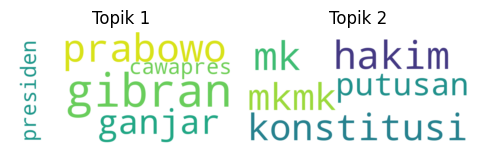

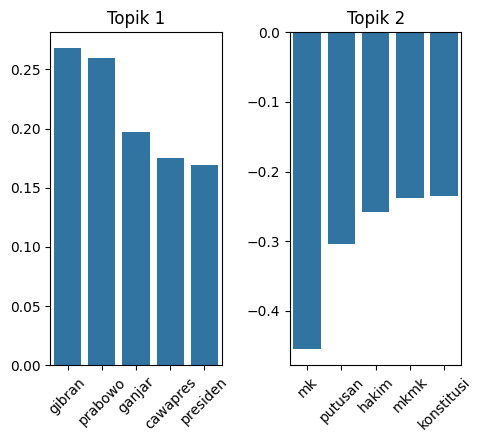

In [3]:
# Contoh penggunaan
data = pd.read_csv('data_pemilu.csv')
num_topics = 2  # Jumlah topik yang diinginkan
top_n_words = 5  # Jumlah kata kunci untuk setiap topik

visualize_lsa_topics(data, num_topics, top_n_words)